     eruptions  waiting
0        3.600       79
1        1.800       54
2        3.333       74
3        2.283       62
4        4.533       85
..         ...      ...
267      4.117       81
268      2.150       46
269      4.417       90
270      1.817       46
271      4.467       74

[272 rows x 2 columns]
     eruptions  waiting
0        3.600       79
1        1.800       54
2        3.333       74
3        2.283       62
4        4.533       85
..         ...      ...
267      4.117       81
268      2.150       46
269      4.417       90
270      1.817       46
271      4.467       74

[272 rows x 2 columns]


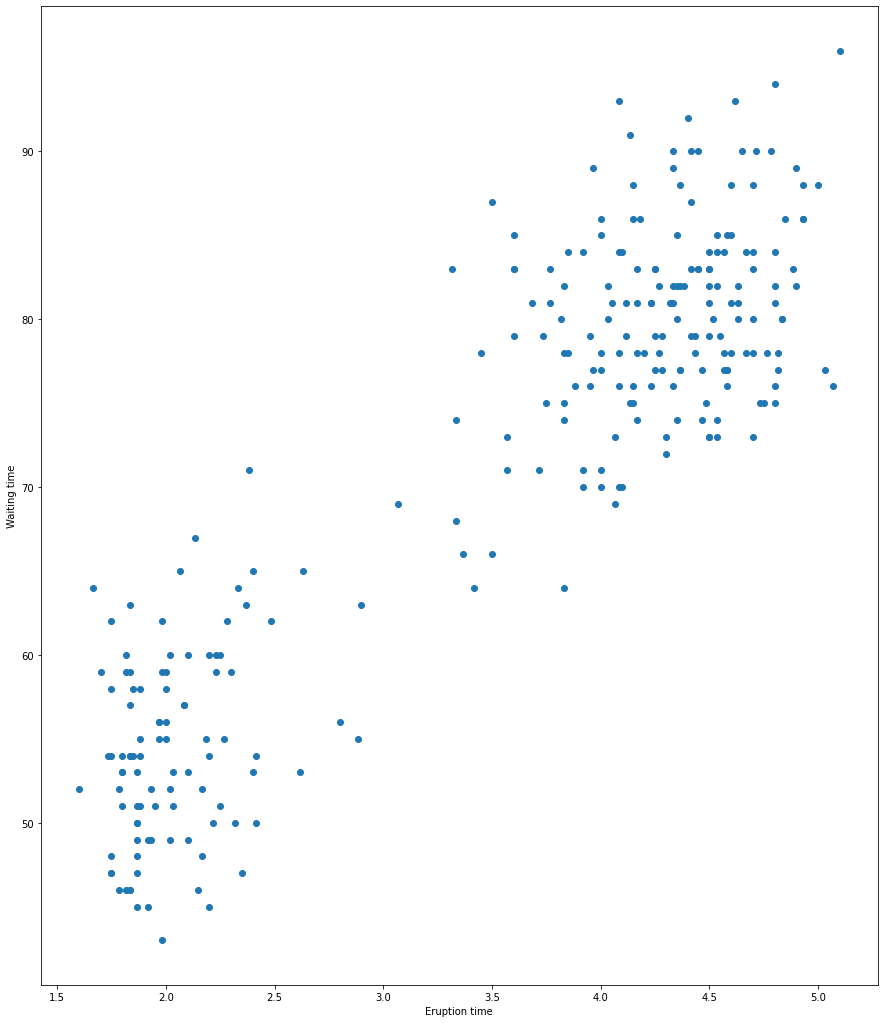

In [31]:

import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets,mixture
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans


df=[]
df = pd.read_csv('data.tsv',sep="\t")
print(df)

plt.ylabel('Waiting time')
plt.xlabel('Eruption time')
plt.plot(df['eruptions'],df['waiting'],linestyle='',marker='o')
print(df)

#Resources: https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html#sklearn.mixture.GaussianMixture.fit
#https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

In [35]:

## Initialize: Reset variables

kmfit = None
gmfit = None
dfn=pd.DataFrame()
dfn2=pd.DataFrame()
GM = None
KM = None
gmcenters = None
kmcenters = None





Iter=1
K-Means
Centers
[[ 4.47976316 88.05263158]
 [ 3.32669231 68.11111111]]

Gaussian Mixture
Weights
[0.50047169 0.49952831]
Centers
[[ 3.53341181 71.4663216 ]
 [ 3.44206819 70.32672097]]


/usr/local/lib/python3.8/site-packages/sklearn/mixture/_base.py:265: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  warnings.warn('Initialization %d did not converge. '




Iter=50
K-Means
Centers
[[ 2.09433    54.75      ]
 [ 4.29793023 80.28488372]]

Gaussian Mixture
Weights
[0.50381564 0.49618436]
Centers
[[ 3.42402337 70.23890094]
 [ 3.55252342 71.56533913]]



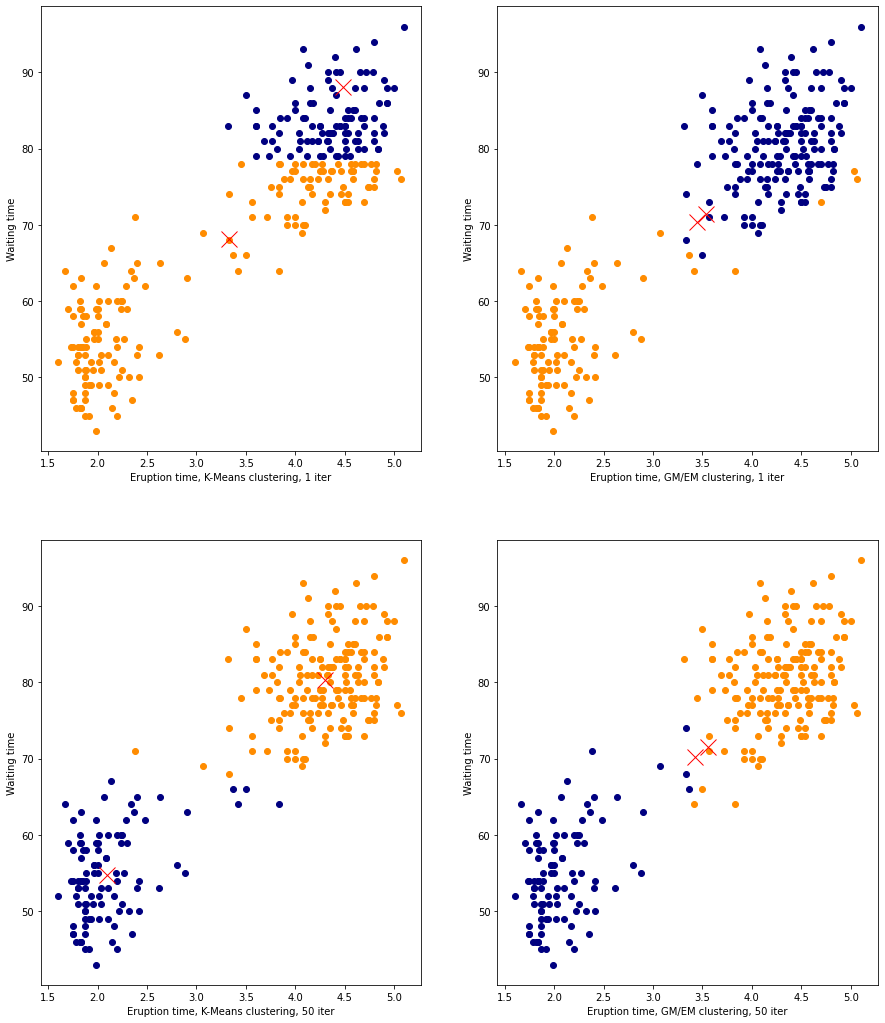

In [36]:
####### Run 
iter =1
GM = GaussianMixture(n_components=2, init_params='random',max_iter=iter,n_init=1)
KM = KMeans(n_clusters=2,init='random',max_iter=iter,n_init=1)


kmfit = KM.fit(df)
kmcenters=kmfit.cluster_centers_
dfn['kmlabels']=kmfit.labels_
print('')
print('Iter=1')
print('K-Means')
#print(kmfit.labels_)
print('Centers')
print(kmcenters)

print('')

gmfit = GM.fit(df)
gmcenters = gmfit.means_
dfn2['gmlabels']=gmfit.predict(df)
#df['gmlabels'] = gmfit.labels_
#gmcenters=gmfit.cluster_centers_

print('Gaussian Mixture')
print('Weights')
print(gmfit.weights_)
print('Centers')
print(gmcenters)
######## 


colors = ["navy","darkorange"]


plt.rcParams["figure.figsize"] = (15,18)
plt.subplot(2,2,1)

for i in range(0,len(df)):
    plt.plot(df['eruptions'][i],df['waiting'][i],linestyle='',
             marker='o',color=colors[dfn['kmlabels'][i]])
plt.plot(kmcenters[0,0],kmcenters[0,1],linestyle='',marker='x',color='red',markersize=16)
plt.plot(kmcenters[1,0],kmcenters[1,1],linestyle='',marker='x',color='red',markersize=16)
plt.ylabel('Waiting time')
plt.xlabel('Eruption time, K-Means clustering, %s iter' % iter)

plt.subplot(2,2,2)
for i in range(0,len(df)):
    plt.plot(df['eruptions'][i],df['waiting'][i],linestyle='',
             marker='o',color=colors[dfn2['gmlabels'][i]])

plt.plot(gmcenters[0,0],gmcenters[0,1],linestyle='',marker='x',color='red',markersize=16)
plt.plot(gmcenters[1,0],gmcenters[1,1],linestyle='',marker='x',color='red',markersize=16)
plt.ylabel('Waiting time')
plt.xlabel('Eruption time, GM/EM clustering, %s iter' % iter)

print('')


## Initialize for more iterations
iter =50
kmfit = None
gmfit = None
dfn=pd.DataFrame()
dfn2=pd.DataFrame()
GM = None
KM = None
gmcenters = None
kmcenters = None

GM = GaussianMixture(n_components=2, init_params='random',max_iter=iter,n_init=1)
KM = KMeans(n_clusters=2,init='random',max_iter=iter,n_init=1)



####### Run
kmfit = KM.fit(df)
kmcenters=kmfit.cluster_centers_
dfn['kmlabels']=kmfit.labels_
print('')
print('Iter=%s' % iter)
print('K-Means')
#print(kmfit.labels_)
print('Centers')
print(kmcenters)

print('')

gmfit = GM.fit(df)
gmcenters = gmfit.means_
dfn2['gmlabels']=gmfit.predict(df)
#df['gmlabels'] = gmfit.labels_
#gmcenters=gmfit.cluster_centers_

print('Gaussian Mixture')
print('Weights')
print(gmfit.weights_)
print('Centers')
print(gmcenters)
######## 

plt.subplot(2,2,3)

for i in range(0,len(df)):
    plt.plot(df['eruptions'][i],df['waiting'][i],linestyle='',
             marker='o',color=colors[dfn['kmlabels'][i]])
plt.plot(kmcenters[0,0],kmcenters[0,1],linestyle='',marker='x',color='red',markersize=16)
plt.plot(kmcenters[1,0],kmcenters[1,1],linestyle='',marker='x',color='red',markersize=16)
plt.ylabel('Waiting time')
plt.xlabel('Eruption time, K-Means clustering, %s iter' % iter)

plt.subplot(2,2,4)
for i in range(0,len(df)):
    plt.plot(df['eruptions'][i],df['waiting'][i],linestyle='',
             marker='o',color=colors[dfn2['gmlabels'][i]])

plt.plot(gmcenters[0,0],gmcenters[0,1],linestyle='',marker='x',color='red',markersize=16)
plt.plot(gmcenters[1,0],gmcenters[1,1],linestyle='',marker='x',color='red',markersize=16)
plt.ylabel('Waiting time')
plt.xlabel('Eruption time, GM/EM clustering, %s iter' % iter)


print('')


In [ ]:
#Notes: may need to change n_init in order to get a better result